In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import warnings
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
warnings.filterwarnings('ignore')

In [10]:
# Import data for Exploratory Data Analysis (EDA)
def load_data(file_path='asset_returns.csv', num_columns=83):
    """Load CSV data and assign column names from 1 to num_columns."""
    column_names = [i + 1 for i in range(num_columns)]
    return pd.read_csv(file_path, names=column_names, header=None)

In [11]:
def calculate_statistics(data):
    """Calculate max, min, mean, and volatility statistics for each column."""
    # Initialize dictionaries for statistics
    stats = {
        'max': {},
        'min': {},
        'mean': {},
        'volatility': {}
    }
    
    # Calculate statistics for each column
    for column in data.columns:
        stats['max'][column] = data[column].max()
        stats['min'][column] = data[column].min()
        stats['mean'][column] = data[column].mean()
        stats['volatility'][column] = data[column].std()
    
    return stats

In [12]:
def print_statistics(stats):
    """Print key statistics in a formatted way."""
    print("\nMaximum Values:")
    max_col = max(stats['max'], key=stats['max'].get)
    print(f"Column with highest max value: {max_col}")
    print(f"Highest max value: {stats['max'][max_col]}")
    
    print("\nMinimum Values:")
    min_col = min(stats['min'], key=stats['min'].get)
    print(f"Column with lowest min value: {min_col}")
    print(f"Lowest min value: {stats['min'][min_col]}")
    
    print("\nMean Values:")
    mean_col = max(stats['mean'], key=stats['mean'].get)
    print(f"Column with highest mean: {mean_col}")
    print(f"Highest mean value: {stats['mean'][mean_col]}")
    
    print("\nVolatility (Standard Deviation):")
    max_vol_col = max(stats['volatility'], key=stats['volatility'].get)
    min_vol_col = min(stats['volatility'], key=stats['volatility'].get)
    print(f"Column with highest volatility: {max_vol_col}")
    print(f"Highest volatility value: {stats['volatility'][max_vol_col]}")
    print(f"Column with lowest volatility: {min_vol_col}")
    print(f"Lowest volatility value: {stats['volatility'][min_vol_col]}")

In [17]:
# Load data
data = load_data()
    
# Print results
print_statistics(calculate_statistics(data))


Maximum Values:
Column with highest max value: 67
Highest max value: 0.805269923

Minimum Values:
Column with lowest min value: 78
Lowest min value: -0.798225309

Mean Values:
Column with highest mean: 78
Highest mean value: 0.008533744217142859

Volatility (Standard Deviation):
Column with highest volatility: 67
Highest volatility value: 0.08872303104957562
Column with lowest volatility: 16
Lowest volatility value: 0.025240995189154288


In [14]:
# Collect all values from the dataframe into a single list.
all_value=[]
for i in column_names:
    all_value =all_value+list(data[i])

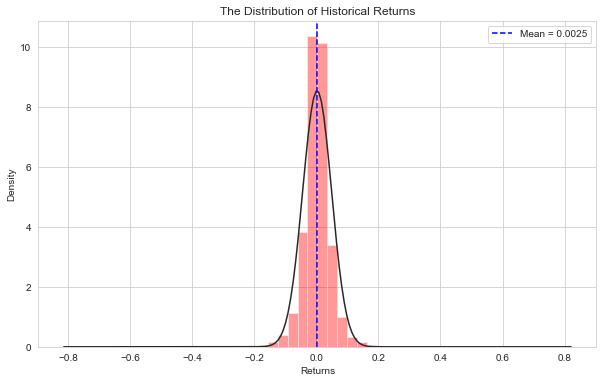

In [63]:
plt.figure(figsize=(10, 6))
#the distribution of historical returns
ax = sns.distplot(all_value,fit=stats.norm, kde=False, hist=True, color='r')
title = 'The Distribution of Historical Returns'
plt.title(title)
# Calculate and display mean
mean_value = sum(all_value) / len(all_value)
plt.axvline(x=mean_value, color='blue', linestyle='--', label=f'Mean = {mean_value:.4f}')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
# Save the figure
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()



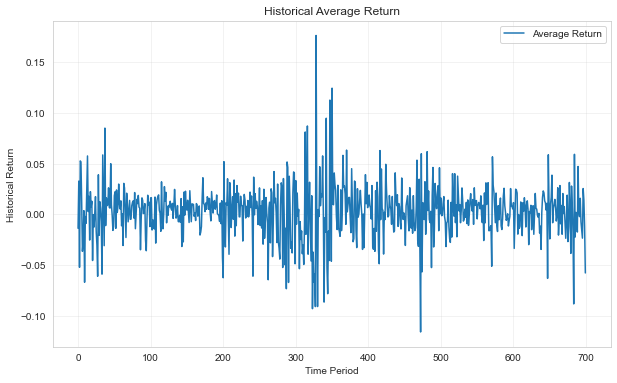

In [64]:
# Calculate average returns across columns for each row
summary_ave_data = data.copy()
summary_ave_data['average'] = summary_ave_data.mean(numeric_only=True, axis=1)

# Plot historical average returns
plt.figure(figsize=(10, 6))
plt.plot(
    summary_ave_data.index,
    summary_ave_data['average'],
    label='Average Return'
)
plt.xlabel('Time Period')
plt.ylabel('Historical Return')
plt.title('Historical Average Return')
plt.legend()
plt.grid(True, alpha=0.3)
# Save the figure
title = 'Historical Average Return'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()

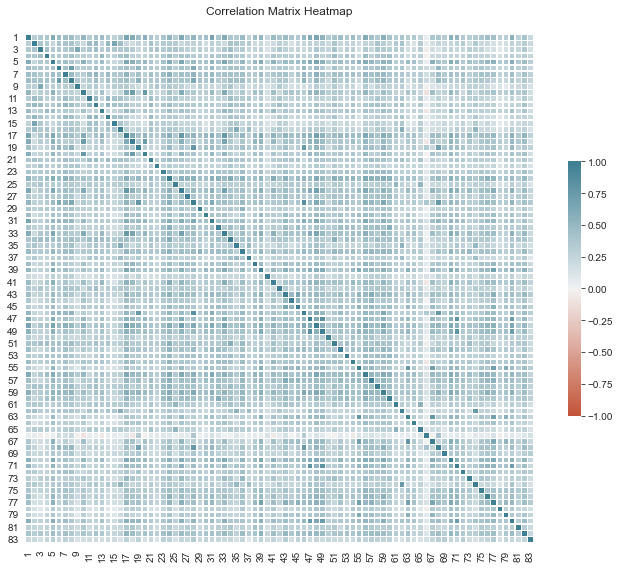

In [65]:
# Calculate correlation matrix and create heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False,  # Set to True if you want correlation values displayed
    fmt='.2f',    # Format for annotation if annot=True
    linewidths=0.5,
    cbar_kws={'shrink': .5}
)
plt.title('Correlation Matrix Heatmap', pad=20)
plt.tight_layout()
# Save the figure
title = 'Correlation Matrix Heatmap'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()

In [32]:
# analyze result
result=pd.read_csv('result.csv',index_col=False)

In [33]:
# divide the result to returns and variance
return_cols = [col for col in result.columns if 'return' in col]
variance_cols = [col for col in result.columns if 'variance' in col]
return_df=result[return_cols]
variance_df=result[variance_cols]

In [34]:
# Collect all values from return_cols in return_df
all_value_inresult = []
for col in return_cols:
    all_value_inresult.extend(return_df[col].tolist())

# Perform Welch's t-test (unequal variances)
t_stat, p_value = ttest_ind(all_value_inresult, all_value, equal_var=False)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.9991
P-value: 0.3180


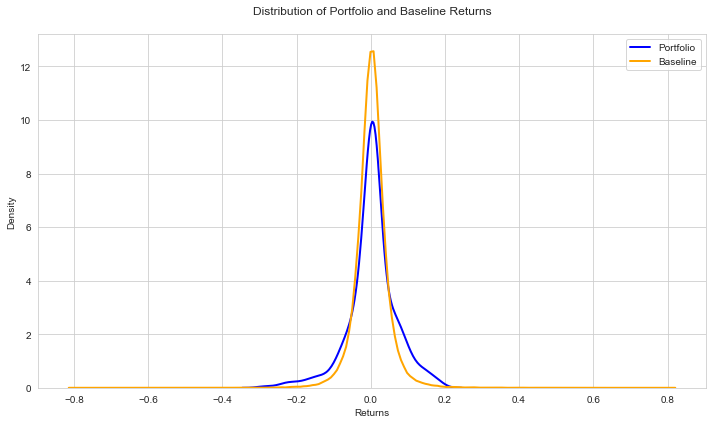

In [66]:
# Set plot style and create KDE plots
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=all_value_inresult,
    label='Portfolio',
    color='blue',
    linewidth=2
)
sns.kdeplot(
    data=all_value,
    label='Baseline',
    color='orange',
    linewidth=2
)
plt.title('Distribution of Portfolio and Baseline Returns', pad=20)
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
title = 'Distribution of Portfolio and Baseline Returns'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()

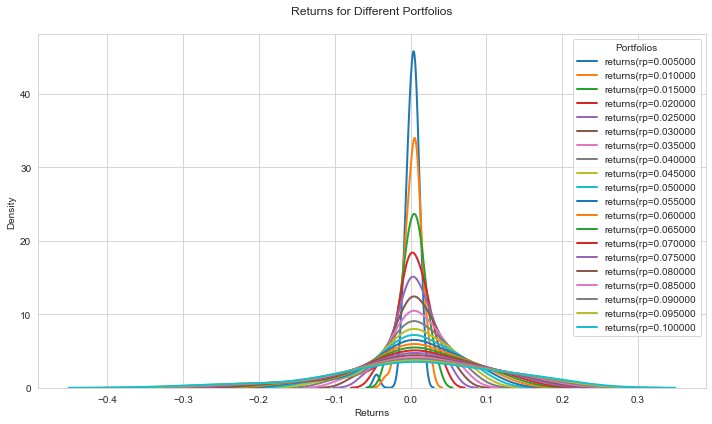

In [67]:
# Plot returns for different portfolios
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
for portfolio in list(return_cols):
    sns.kdeplot(
        data=return_df[portfolio],
        label=portfolio,
        linewidth=2
    )
plt.title('Returns for Different Portfolios', pad=20)
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend(title='Portfolios')
plt.tight_layout()
title = 'Returns for Different Portfolios'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()

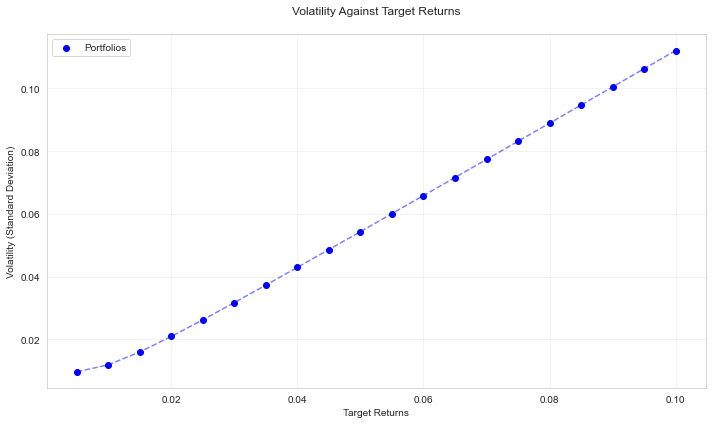

In [68]:
# Calculate standard deviations for each portfolio
std_list = [return_df[col].std() for col in return_cols]

# Generate target returns range
target_returns = np.linspace(0.005, 0.1, num=20)

# Plot volatility against target returns
plt.figure(figsize=(10, 6))
plt.scatter(target_returns, std_list, color='blue', label='Portfolios')
plt.plot(target_returns, std_list, color='blue', linestyle='--', alpha=0.5)
plt.ylabel('Volatility (Standard Deviation)')
plt.xlabel('Target Returns')
plt.title('Volatility Against Target Returns', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
title = 'Volatility Against Target Returns'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()

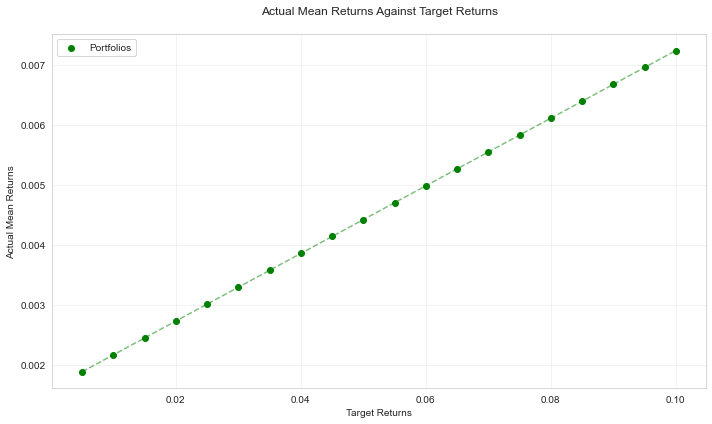

In [69]:
# Calculate mean returns for each portfolio
mean_returns_list = [return_df[col].mean() for col in return_cols]

# Define target returns (assuming xxxx from previous context)
target_returns = np.linspace(0.005, 0.1, num=20)

# Plot actual mean returns against target returns
plt.figure(figsize=(10, 6))
plt.scatter(target_returns, mean_returns_list, color='green', label='Portfolios')
plt.plot(target_returns, mean_returns_list, color='green', linestyle='--', alpha=0.5)
plt.ylabel('Actual Mean Returns')
plt.xlabel('Target Returns')
plt.title('Actual Mean Returns Against Target Returns', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
title = 'Actual Mean Returns Against Target Returns'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()

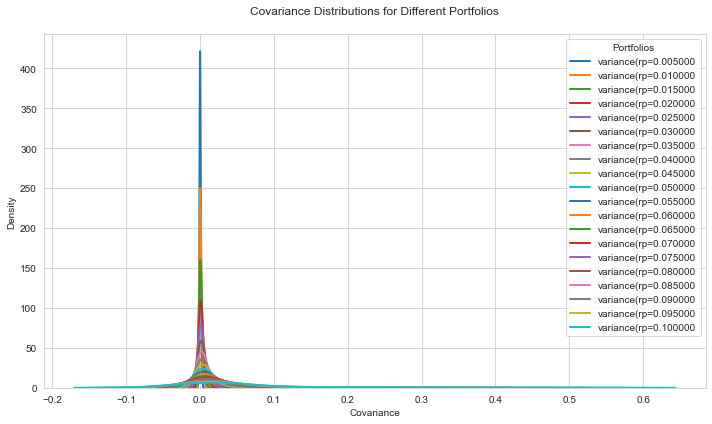

In [70]:
# Collect all variance values from variance_cols
all_variance_inresult = []
for col in variance_cols:
    all_variance_inresult.extend(variance_df[col].tolist())

# Get variance DataFrame column names
variance_df_names = list(variance_df.columns)

# Plot covariance distributions for different portfolios
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
for portfolio in variance_df_names:
    sns.kdeplot(
        data=variance_df[portfolio],
        label=portfolio,
        linewidth=2
    )
plt.xlabel('Covariance')
plt.ylabel('Density')
plt.title('Covariance Distributions for Different Portfolios', pad=20)
plt.legend(title='Portfolios')
plt.tight_layout()
title = 'Covariance Distributions for Different Portfolios'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()

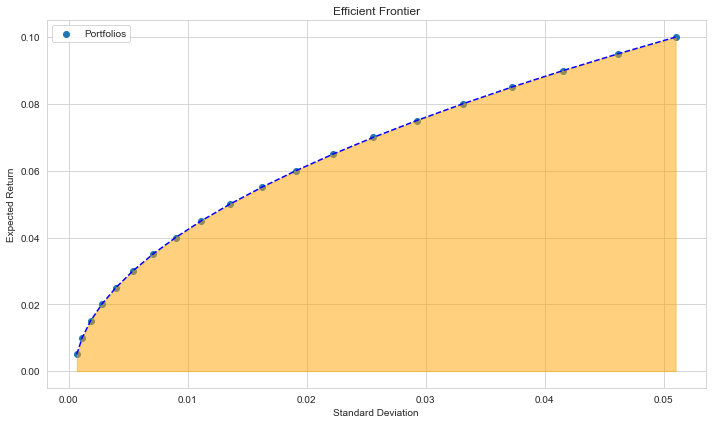

In [71]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Generate expected return values
expected_returns = np.linspace(0.005, 0.1, num=20)

# Calculate the mean standard deviation for each portfolio in variance_df
portfolio_std_devs = [variance_df[name].mean() for name in variance_df_names]

# Plotting the Efficient Frontier
plt.scatter(portfolio_std_devs, expected_returns, label='Portfolios')
plt.plot(portfolio_std_devs, expected_returns, color='blue', linestyle='--')
plt.fill_between(portfolio_std_devs, expected_returns, interpolate=True, color='orange', alpha=0.5)

# Adding labels and title
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.grid(True)
plt.tight_layout()
title = 'Efficient Frontier'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
# Display the plot
plt.show()

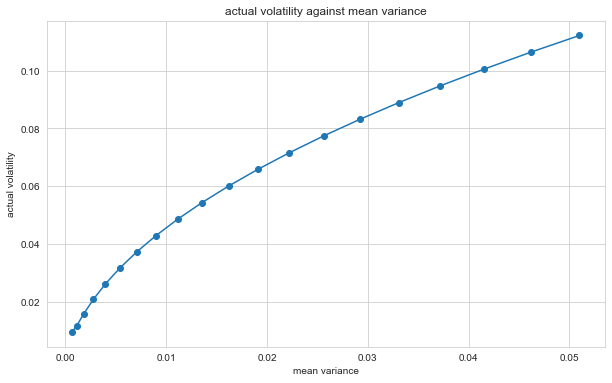

In [72]:
#actual volatility against mean variance
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std_devs,std_list)
plt.plot(portfolio_std_devs,std_list)
plt.ylabel('actual volatility')
plt.xlabel('mean variance')
plt.title('actual volatility against mean variance')
title = 'actual volatility against mean variance'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()

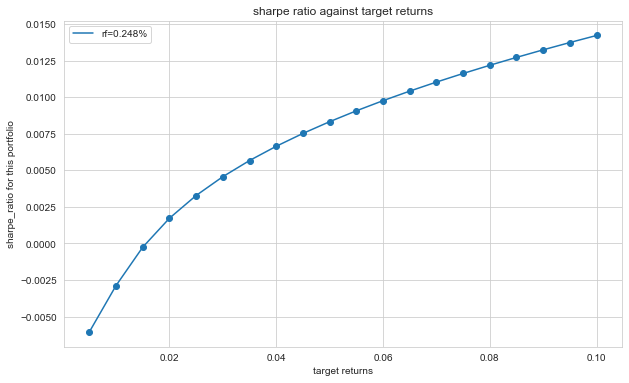

In [73]:
#sharpe ratio against target returns
plt.figure(figsize=(10, 6))
sharpe_ratio_list1=[]
rf=0.00248
for i in range(0,len(return_df.columns)):
    sharpe_ratio_list1.append((mean_returns_list[i]-rf)/math.sqrt(std_list[i]))
plt.scatter(expected_returns,sharpe_ratio_list1)
plt.plot(expected_returns,sharpe_ratio_list1,label="rf="+str(rf*100)+"%")
plt.ylabel('sharpe_ratio for this portfolio')
plt.legend()
plt.xlabel('target returns')
plt.title('sharpe ratio against target returns')
title = 'sharpe ratio against target returns'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show() 

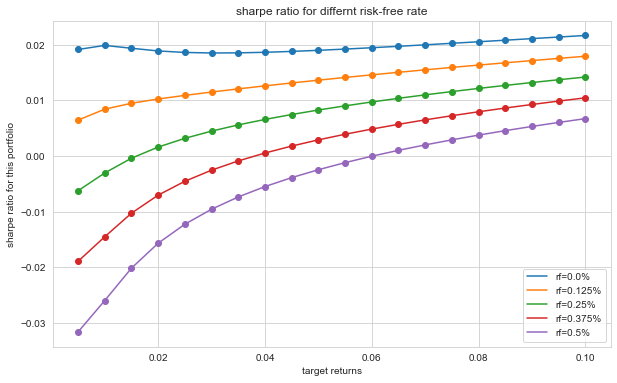

In [74]:
#sharpe ratio for differnt risk-free rate
plt.figure(figsize=(10, 6))
rf_list=np.linspace(0, 0.005, num=5)
for rf in rf_list:
    sharpe_ratio_list=[]
    for i in range(0,len(return_df.columns)):
        sharpe_ratio_list.append((mean_returns_list[i]-rf)/math.sqrt(std_list[i]))
    plt.scatter(expected_returns,sharpe_ratio_list)
    plt.plot(expected_returns,sharpe_ratio_list,label="rf="+str(rf*100)+"%")
plt.ylabel('sharpe ratio for this portfolio')
plt.legend()
plt.xlabel('target returns')
plt.title('sharpe ratio for differnt risk-free rate')
title = 'sharpe ratio for differnt risk-free rate'
filename = title.lower().replace(' ', '_') + '.png'
output_path = os.path.join('pics', filename)
plt.savefig(output_path, dpi=300)
plt.show()   